In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

pf_data.head()

In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2021-04-01,134.279999,4019.870117
2021-04-05,136.449997,4077.909912
2021-04-06,136.500000,4073.939941
2021-04-07,136.740005,4079.949951
2021-04-08,137.259995,4097.169922


<AxesSubplot:xlabel='Date'>

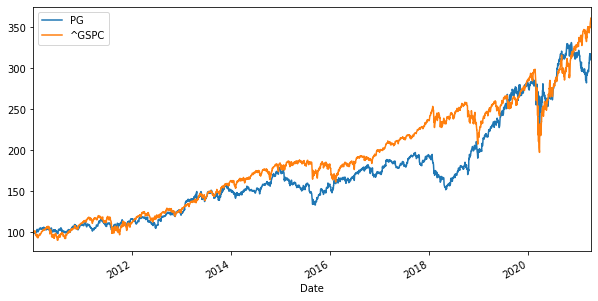

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.101825
^GSPC    0.113394
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029190,0.017679
^GSPC,0.017679,0.030439


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.593098
^GSPC,0.593098,1.000000


In [13]:
num_assets = len(assets)

In [14]:
num_assets

2

In [15]:
arr = np.random.random(2)
arr

array([0.13190242, 0.08912243])

In [16]:
arr[0] + arr[1]

0.22102484689141288

In [17]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.21838431, 0.78161569])

In [18]:
weights[0] + weights[1]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.10494206615716695

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.024748980193774896

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.15731808603518826

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.10844154918533146,
  0.10850717720423705,
  0.10985515004821077,
  0.10950915785997342,
  0.1049236685594443,
  0.10659110686716672,
  0.11036110235226283,
  0.10476573682213283,
  0.1059954800437803,
  0.10855628295453973,
  0.1080556753029847,
  0.10203214174488082,
  0.1040560089460251,
  0.10770552613114336,
  0.10444719069456807,
  0.11076823373921516,
  0.10711266202734998,
  0.11026768425519087,
  0.10585370283362273,
  0.1057307842240077,
  0.11145557750271917,
  0.10702938440765573,
  0.10942441360785699,
  0.10461363088959001,
  0.11149403199759275,
  0.10632189131905839,
  0.11264706149118295,
  0.1105235465354133,
  0.10810665302289817,
  0.10945569642235699,
  0.10938380545574551,
  0.1047874495501963,
  0.10747950576617483,
  0.10812622145437749,
  0.11003850097877764,
  0.10364689215065187,
  0.10592809111850515,
  0.11275752215675433,
  0.1096307353526204,
  0.10540959050614425,
  0.10779729071721793,
  0.10889256545632386,
  0.10768687201324659,
  0.110807996327381

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.11275488, 0.10452798, 0.10651248, 0.10544297, 0.11003937,
        0.10903145, 0.10635472, 0.10609241, 0.10707494, 0.10731361,
        0.10714462, 0.1114778 , 0.10705084, 0.10271101, 0.11241302,
        0.11006611, 0.10770281, 0.10829952, 0.10722587, 0.10888924,
        0.11061383, 0.10680847, 0.103505  , 0.10680947, 0.10444798,
        0.10699816, 0.10818434, 0.10599867, 0.10722292, 0.10563907,
        0.1019094 , 0.10283537, 0.11206884, 0.10552569, 0.10822129,
        0.10214476, 0.10457222, 0.10533058, 0.1059559 , 0.10307349,
        0.10788838, 0.11139517, 0.10478394, 0.103488  , 0.10367437,
        0.10726172, 0.10775534, 0.1074671 , 0.10867419, 0.1101614 ,
        0.10907983, 0.1076147 , 0.10847904, 0.10795954, 0.11016335,
        0.10577684, 0.10438787, 0.10695964, 0.11077793, 0.11072107,
        0.10625199, 0.10740761, 0.10297637, 0.10445736, 0.10571756,
        0.10825909, 0.11272927, 0.10305711, 0.10628625, 0.10592976,
        0.10717512, 0.10358446, 0.10360563, 0.10

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.112755,0.170596
1,0.104528,0.158543
2,0.106512,0.154423
3,0.105443,0.156090
4,0.110039,0.158365


In [23]:
portfolios.tail()

,Return,Volatility
995,0.112502,0.169160
996,0.107076,0.154080
997,0.108794,0.155334
998,0.110787,0.160997
999,0.104755,0.157850


Text(0, 0.5, 'Expected Return')

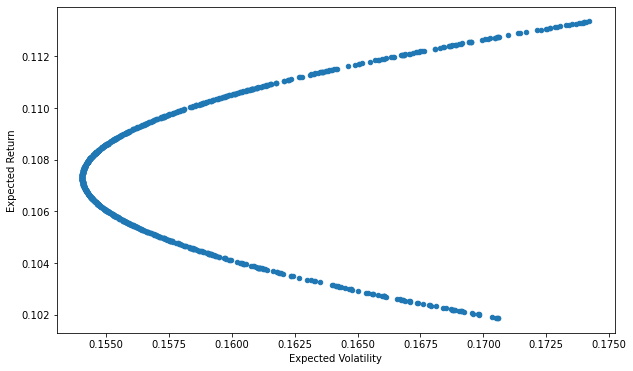

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

Text(0, 0.5, 'Expected Return')

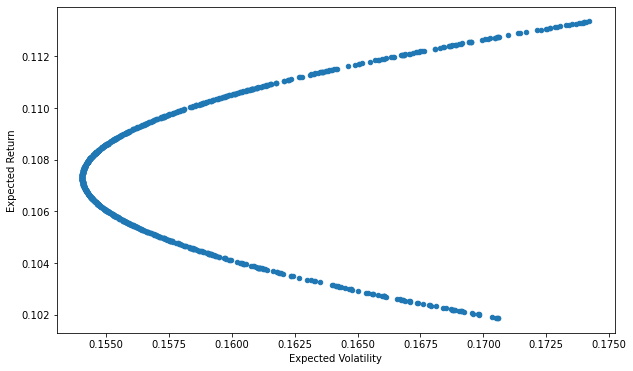

In [25]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')